# Credit risk modeling in Python - part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

   ## 1. The data: an overview

In [2]:
data = pd.read_csv("creditrisk_pydata_nas.csv", index_col = 0)
data.head(15)

,default,month,age,amount,address,employer,children,payfreq,marstat,home
1,0,21,25,1000.0,0.3,1.1,0,3,1,1.0
2,0,23,40,NaN,5.6,6.9,2,3,2,1.0
3,0,24,21,1400.0,8.7,NaN,0,3,1,2.0
4,0,24,21,1200.0,21.5,3.3,0,3,1,2.0
5,0,24,62,1500.0,1.2,1.1,0,3,1,2.0
6,0,18,35,4000.0,9.6,4.5,0,3,3,1.0
7,0,24,52,5000.0,28.4,6.4,0,3,2,1.0
8,0,24,32,1000.0,2.8,2.1,0,3,1,2.0
9,0,19,38,1500.0,0.2,4.6,2,1,2,2.0
10,0,20,63,2000.0,17.8,12.9,0,1,2,1.0


- `payfreq`: `1`: quarterly; `2`: bi-monthly; `3`: monthly; `4`: bi-weekly
- `marstat`: `1`: single; `2`: married; `3`: divorced; `4`: widowed
- `home`:`1.0`: yes; `2.0`: no

- The column `default` represents whether someone defaulted on the loan or not
    - when `0`, the applicant did not default (until now)
    - when `1` it means the applicant defaulted
    
- `month` represents the month of the last observed repayment

- `age` shows the age of an applicant
- `amount` is the amount of the loan
- `address` represents how long the applicant has been living at his/her current address (in years)
- `employer` represents how long the applicant has been working at his/her current employer (in years)
- `children` represents how many children the applicant has

- `payfreq` represents the repayment frequency of the applicant
     - `1`: quarterly
     - `2`: bi-monthly
     - `3`: monthly
     - `4`: bi-weekly

- `marstat` is the marital status of the applicant
     - `1`: single
     - `2`: married
     - `3`: divorced
     - `4`: widowed
- `home` represents whether the applicant owns a house or not
     - `1.0`: yes
     - `2.0`: no

In [3]:
data.count()

default     4000
month       4000
age         4000
amount      3767
address     4000
employer    3622
children    4000
payfreq     4000
marstat     4000
home        3986
dtype: int64

## 2. Exploratory data analysis

Let's have a look at some summary statistics of the data.

In [4]:
data.describe()

,default,month,age,amount,address,employer,children,payfreq,marstat,home
count,4000.000000,4000.000000,4000.000000,3767.000000,4000.000000,3622.000000,4000.000000,4000.000000,4000.000000,3986.000000
mean,0.076750,21.111250,36.489000,1997.013539,8.244850,7.724627,0.721750,2.291250,1.742250,1.386101
std,0.266228,4.673311,12.062494,1120.508252,8.140682,7.672185,1.127894,0.957942,0.630011,0.486915
min,0.000000,2.000000,18.000000,500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,20.000000,27.000000,1100.000000,1.900000,2.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,23.000000,35.000000,2000.000000,5.300000,5.300000,0.000000,3.000000,2.000000,1.000000
75%,0.000000,24.000000,45.000000,2500.000000,12.225000,10.900000,1.000000,3.000000,2.000000,2.000000
max,1.000000,24.000000,321.000000,11500.000000,71.100000,76.200000,33.000000,4.000000,4.000000,2.000000


Calling describe() throws a warning, because the percentiles cannot be computed in the summary statistics for the variables with missing values (`NaN`s). But there are 2 other things that we have to look out for:
- weird to have summary statistics for `payfreq`, `marstat` and `home`: these are categories
- we have to look out for *outliers*

For the remainder of the exploratory data analysis, I'll split the discussion of the data up in three parts:
- discussion of the continuous predictors `age`, `amount`, `address`, `employer`, `chidren`
- discussion of the categorical predictors `payfreq`, `marstat` and `home`
- discussion of the outcome variables, `default` (and `time`)

### 2.1 continuous predictors

#### a. outliers

When is a value an outlier?
- rule of thumb: `(Q1 - 1.5 * IQR)`; `(Q3 + 1.5 * IQR)`
- expert judgement

In [5]:
data.age.nlargest(6)

1095    321
1458    121
326      78
1208     75
2068     72
2969     72
Name: age, dtype: int64

- Q1 = 27; Q3 = 45
- IQR = 18
- 45 + 1.5 \* 18 =  **72**

Let's plot to look at the overal distribution

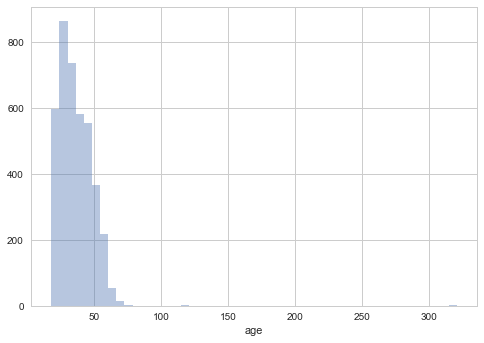

In [6]:
sns.distplot(data.age, kde = False, bins=50)
plt.show()

Let's remove the 2 outliers: 

In [7]:
data = data[data.age < 100]

In [8]:
data.count()

default     3998
month       3998
age         3998
amount      3765
address     3998
employer    3620
children    3998
payfreq     3998
marstat     3998
home        3984
dtype: int64

Let's look at `children` next. 

In [9]:
data.iloc[:, 2:7].describe()

,age,amount,address,employer,children
count,3998.000000,3765.000000,3998.000000,3620.000000,3998.000000
mean,36.396698,1996.799469,8.246998,7.715635,0.721611
std,11.114376,1120.480523,8.141865,7.661004,1.127937
min,18.000000,500.000000,0.000000,0.000000,0.000000
25%,27.000000,1100.000000,1.900000,2.000000,0.000000
50%,35.000000,2000.000000,5.300000,5.300000,0.000000
75%,45.000000,2500.000000,12.275000,10.900000,1.000000
max,78.000000,11500.000000,71.100000,76.200000,33.000000


In [10]:
data.children.nlargest(6)

3893    33
679      6
515      5
533      5
1819     5
1874     5
Name: children, dtype: int64

In [11]:
data = data[data.children < 30]

In [12]:
data.iloc[:, 2:7].describe()

,age,amount,address,employer,children
count,3997.000000,3764.000000,3997.000000,3619.000000,3997.000000
mean,36.395046,1997.197131,8.248862,7.717380,0.713535
std,11.115276,1120.363648,8.142031,7.661343,1.005863
min,18.000000,500.000000,0.000000,0.000000,0.000000
25%,27.000000,1100.000000,1.900000,2.000000,0.000000
50%,35.000000,2000.000000,5.300000,5.300000,0.000000
75%,45.000000,2500.000000,12.300000,10.900000,1.000000
max,78.000000,11500.000000,71.100000,76.200000,6.000000


Let's look at the max of `employer` and `address`. 

2 questions: 
- Are these outliers? 
- Somerthing else is happening here. *hint:* how do these relate to the other continuous variables?

Take a closer look at address and employer and how they relate to one of the other continuous variables

In [13]:
data.iloc[2700:2710,:]

,default,month,age,amount,address,employer,children,payfreq,marstat,home
2703,0,24,24,1200.0,1.1,3.1,0,3,1,NaN
2704,1,19,29,1000.0,3.1,8.1,0,3,2,2.0
2705,0,24,38,2000.0,0.9,76.2,0,2,2,1.0
2706,0,24,28,3150.0,5.6,4.1,1,1,2,2.0
2707,0,24,25,NaN,1.0,NaN,0,3,2,1.0
2708,0,22,18,2000.0,14.1,1.1,0,3,1,2.0
2709,0,24,23,2400.0,1.0,1.8,0,3,1,1.0
2710,0,24,30,3000.0,3.1,8.5,1,3,1,1.0
2711,1,10,52,3000.0,25.0,0.7,0,3,2,1.0
2712,0,19,19,NaN,11.1,2.8,0,3,1,2.0
